<a href="https://colab.research.google.com/github/Jing-LI11/Python_class/blob/main/JingLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basis python programming
####Demonstrate the use of variables, lists, dictionaries, loops, and conditional statements.
####Write at least one reusable function that performs a task relevant to your analysis.

#import dataset

##find dataset from google drive

In [2]:
import pandas as pd
!pip list

try:
  import janitor
except:
  print("Module is not preinstalled!Installing now...")
  !pip install pyjanitor --quiet

import janitor
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.listdir('/content/drive/My Drive'))

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.27.0.32.44
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread         

##import and check dataset

In [3]:
feature = pd.read_csv('/content/drive/My Drive/Features.csv')
feature.head()
sales = pd.read_csv('/content/drive/My Drive/sales.csv')
sales.head()

unique_features = feature[[]].drop_duplicates().shape[0]
print(f"unique data in Features are {unique_features} rows")
unique_sales = sales[[]].drop_duplicates().shape[0]
print(f"unique data in Sales are {unique_sales} rows")

sales_agg = sales.groupby(['Store', 'Date'], as_index=False)['Weekly_Sales'].sum()
print(sales_agg.head())
feature = pd.merge(feature, sales_agg, on=['Store', 'Date'], how='left')
print(feature.head())
print(f"left-join data has：{feature.shape[0]} rows")

feature.to_csv('/content/drive/My Drive/featuresales.csv', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique data in Features are 8190 rows
unique data in Sales are 421570 rows
   Store        Date  Weekly_Sales
0      1  01/04/2011    1495064.75
1      1  01/06/2012    1624477.58
2      1  01/07/2011    1488538.09
3      1  01/10/2010    1453329.50
4      1  02/03/2012    1688420.76
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0        NaN        NaN        NaN  211.096358         8.106      False   
1        NaN        NaN        NaN  211.242170         8.106       True   
2        NaN        NaN        NaN  211.289143         8.106   

#Basic python programming

###variables

In [4]:
total_rows = feature.shape[0]
total_columns = feature.shape[1]
column_names = feature.columns.tolist()
print(f"dataset {total_rows} rows {total_columns} columns")
print(f"column name as below：{column_names}")

dataset 8190 rows 13 columns
column name as below：['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Weekly_Sales']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###lists

In [5]:
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
print(f"all MarkDown list：{markdown_columns}")

list=(1,2,3,4,2)
print(list[0:4])
ListUnique=set(list)
len(ListUnique)
matrix=[list,ListUnique]
matrix

all MarkDown list：['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
(1, 2, 3, 4)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 2, 3, 4, 2), {1, 2, 3, 4}]

###dictionaries

In [6]:
fill_strategies = {
    'CPI': 'interpolate',
    'Unemployment': 'interpolate',
    'MarkDown1': 0,
    'MarkDown2': 0,
    'MarkDown3': 0,
    'MarkDown4': 0,
    'MarkDown5': 0
}
print("\nfill strategy: ", fill_strategies)


fill strategy:  {'CPI': 'interpolate', 'Unemployment': 'interpolate', 'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0}


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###loops

In [7]:
for column in ['CPI', 'Unemployment']:
    feature[column] = feature[column].interpolate()
    print(f"missing values in {column} were filled by linear regression method")

missing values in CPI were filled by linear regression method
missing values in Unemployment were filled by linear regression method


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###condition statements

In [8]:
if feature.isnull().sum().sum() > 0:
    print("missing values waiting for being handled")
else:
    print("no missing values")

missing values waiting for being handled


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Data Manipulation
dataset already loaded and inspected

##handling missing values and duplicates

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Weekly_Sales    1755
dtype: int64


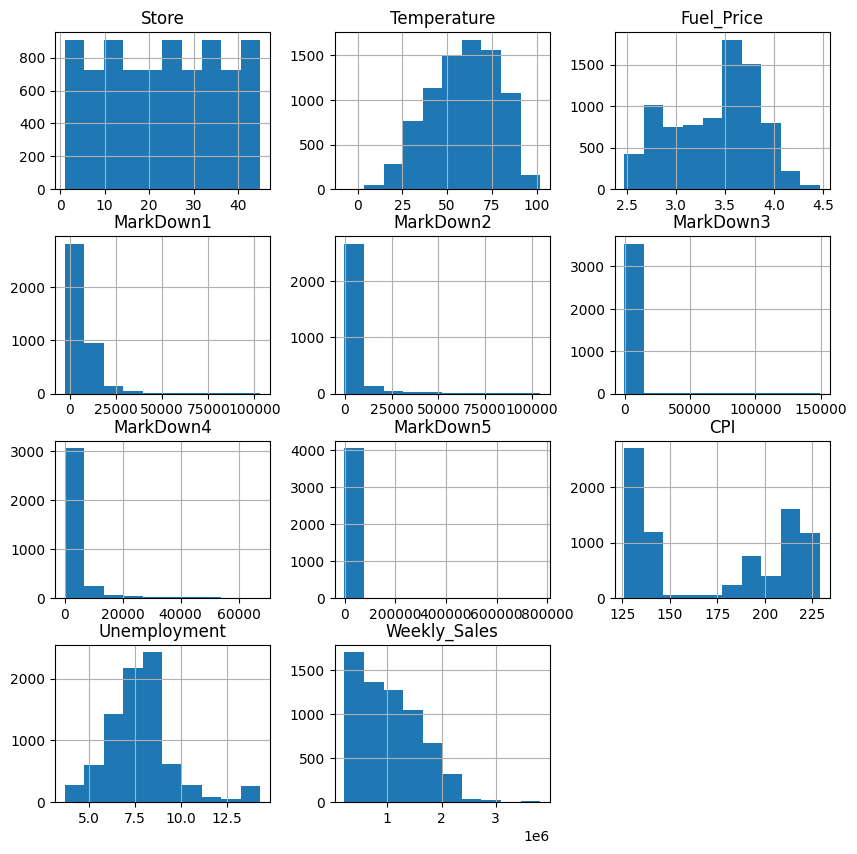

missing values in MarkDown1 were filled by 0。
missing values in MarkDown2 were filled by 0。
missing values in MarkDown3 were filled by 0。
missing values in MarkDown4 were filled by 0。
missing values in MarkDown5 were filled by 0。
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64


<ipython-input-9-fe93244a9084>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature[column].fillna(0, inplace=True)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1643690.90
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,1641957.44
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,1611968.17
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,1409727.59
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8146,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,713173.95
8147,45,05/10/2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,733455.07
8148,45,12/10/2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,734464.36
8149,45,19/10/2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,718125.53


In [9]:
print(feature.isnull().sum())
import matplotlib.pyplot as plt
feature.hist(figsize=(10,10))
plt.show()

for column in markdown_columns:
    feature[column].fillna(0, inplace=True)
    print(f"missing values in {column} were filled by 0。")
#drop missing value in weekly sales
featurenona = feature.dropna()
print(featurenona.isnull().sum())
featurenona

In [10]:
featuresales = featurenona.drop_duplicates()
print(f"unique data in Features are {featuresales.shape[0]} rows")

unique data in Features are 6435 rows


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###transform data format (object -> date)

In [11]:
featuresales['Date'] = pd.to_datetime(featuresales['Date'], format='%d/%m/%Y')
featuresales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 8150
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     6435 non-null   float64       
 5   MarkDown2     6435 non-null   float64       
 6   MarkDown3     6435 non-null   float64       
 7   MarkDown4     6435 non-null   float64       
 8   MarkDown5     6435 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  6435 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
 12  Weekly_Sales  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1)
memory usage: 659.8 KB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Filter, sort, and group data to extract meaningful subsets or patterns.

In [12]:
holiday_sales = featuresales[featuresales['IsHoliday'] == True]
print("holiday sales data:")
print(holiday_sales.head())

high_sales = featuresales[featuresales['Weekly_Sales'] > 20000]
print("\nweekly sales > 20,000：")
print(high_sales.head())

sorted_sales = featuresales.sort_values(by='Weekly_Sales', ascending=False)
print("\ndescending sales sorted:")
print(sorted_sales.head())

store_sales = featuresales.groupby('Store')['Weekly_Sales'].sum().reset_index()
print("\ntotal sales by store:")
print(store_sales.head())
store_max_sales = featuresales.groupby('Store')['Weekly_Sales'].max().reset_index()
print("\nbest sales by stores:")
print(store_max_sales.head())

holiday sales data:
    Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
1       1 2010-02-12        38.51       2.548        0.0        0.0   
31      1 2010-09-10        78.69       2.565        0.0        0.0   
42      1 2010-11-26        64.52       2.735        0.0        0.0   
47      1 2010-12-31        48.43       2.943        0.0        0.0   
53      1 2011-02-11        36.39       3.022        0.0        0.0   

    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
1         0.0        0.0        0.0  211.242170         8.106       True   
31        0.0        0.0        0.0  211.495190         7.787       True   
42        0.0        0.0        0.0  211.748433         7.838       True   
47        0.0        0.0        0.0  211.404932         7.838       True   
53        0.0        0.0        0.0  212.936705         7.742       True   

    Weekly_Sales  
1     1641957.44  
31    1507460.69  
42    1955624.11  
47    1367320.01  
5

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Mathematical Operations
shown as above and below

In [13]:
import numpy as np
store_mean_sales = featuresales.groupby('Store')['Weekly_Sales'].mean().reset_index()
print("\nmean of sales by store:")
print(store_mean_sales.head())

date_sales = featuresales.groupby('Date')['Weekly_Sales'].sum().reset_index()


mean of sales by store:
   Store  Weekly_Sales
0      1  1.555264e+06
1      2  1.925751e+06
2      3  4.027044e+05
3      4  2.094713e+06
4      5  3.180118e+05


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Data Visualization

##A bar or line chart to show trends or comparisons.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


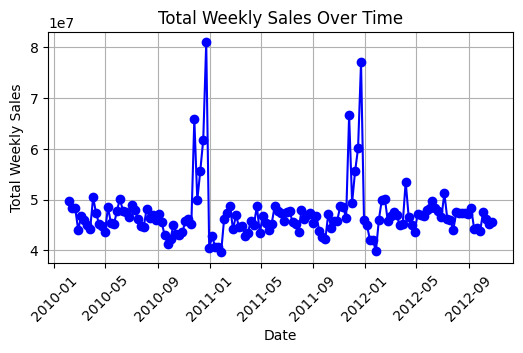

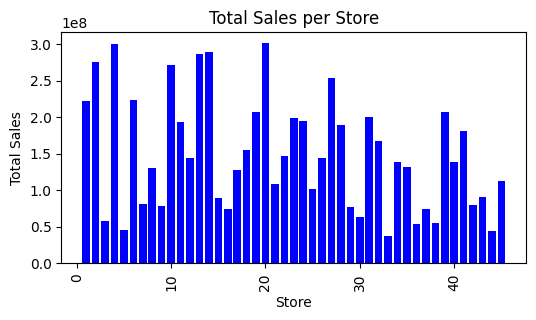

In [14]:
plt.figure(figsize=(6, 3))
plt.plot(date_sales['Date'], date_sales['Weekly_Sales'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(store_sales['Store'], store_sales['Weekly_Sales'], color='blue')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales per Store')
plt.xticks(rotation=90)
plt.show()

##A scatter plot or histogram for distributions.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


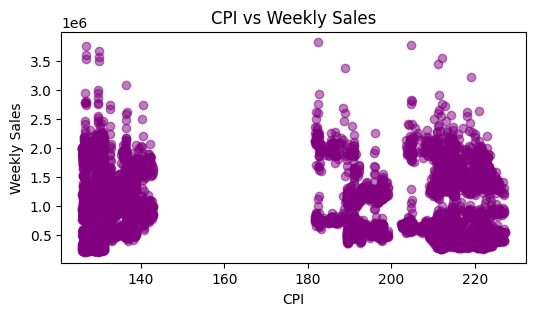

In [15]:
plt.figure(figsize=(6, 3))
plt.scatter(featuresales['CPI'], featuresales['Weekly_Sales'], alpha=0.5, color='purple')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


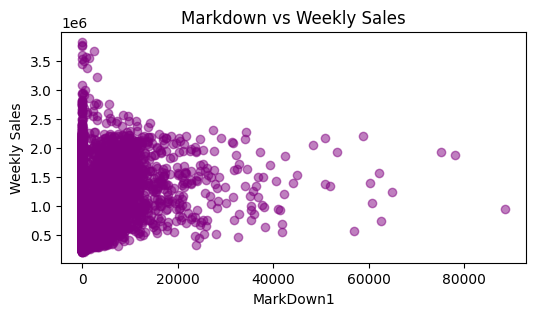

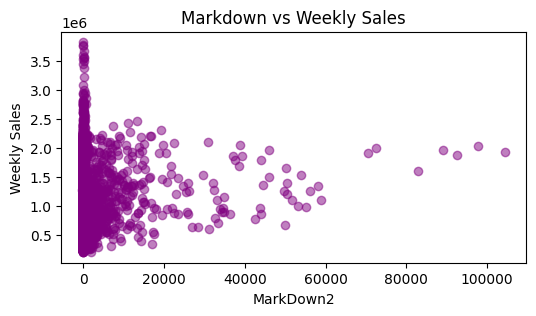

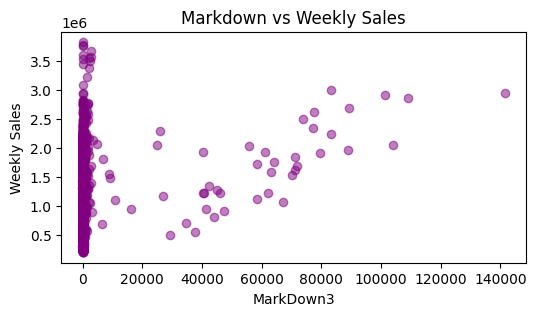

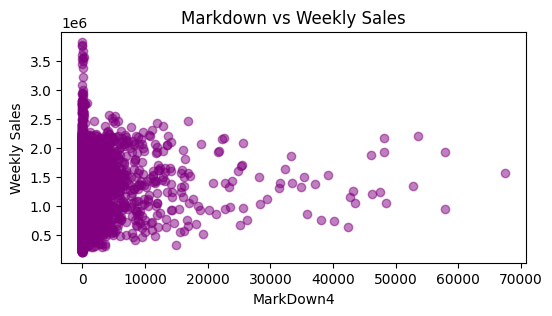

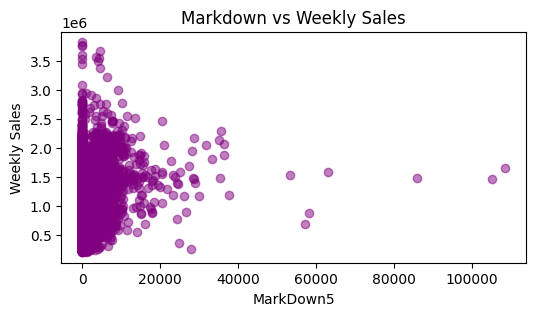

In [16]:
for column in markdown_columns:
  plt.figure(figsize=(6, 3))
  plt.scatter(featuresales[column], featuresales['Weekly_Sales'], alpha=0.5, color='purple')
  plt.xlabel(column)
  plt.ylabel('Weekly Sales')
  plt.title('Markdown vs Weekly Sales')
  plt.show()

##A heatmap or boxplot for additional insights.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-ac3d0ff861b5>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_holiday_sales, holiday_sales], labels=['Non-Holiday', 'Holiday'])


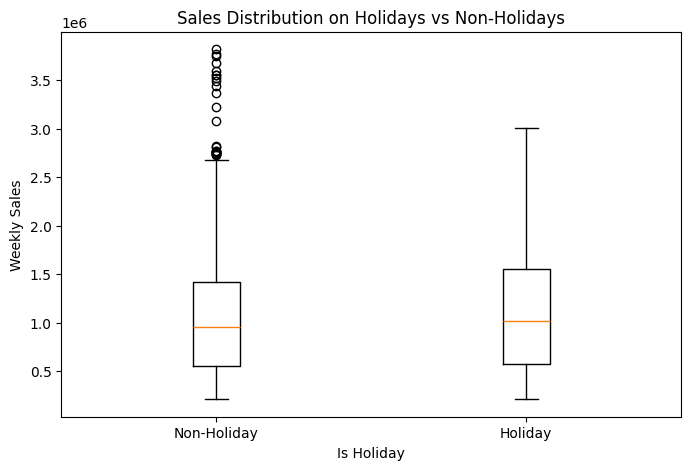

In [17]:
holiday_sales = featuresales[featuresales['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = featuresales[featuresales['IsHoliday'] == False]['Weekly_Sales']

plt.figure(figsize=(8, 5))
plt.boxplot([non_holiday_sales, holiday_sales], labels=['Non-Holiday', 'Holiday'])
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Sales Distribution on Holidays vs Non-Holidays')
plt.show()

#SQL

##Create a database and store a processed version of the dataset.

In [18]:
!pip install sqlalchemy --quiet
import os
os.getcwd()
from sqlalchemy import create_engine

engine = create_engine('sqlite:///sales_data.db')

featuresales.to_sql('featuresales', engine, index=False, if_exists='replace')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6435

##Query the database for specific insights

In [19]:
query_holiday_sales = """
SELECT IsHoliday, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY IsHoliday
"""

holiday_sales = pd.read_sql_query(query_holiday_sales, engine)

print("average sales: holiday vs no holiday")
print(holiday_sales)

query_fuel_sales = """
SELECT Fuel_Price, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY Fuel_Price
ORDER BY Fuel_Price
"""

fuel_sales = pd.read_sql_query(query_fuel_sales, engine)

print("fuel vs sales:")
print(fuel_sales)

average sales: holiday vs no holiday
   IsHoliday  Average_Sales
0          0   1.041256e+06
1          1   1.122888e+06
fuel vs sales:
     Fuel_Price  Average_Sales
0         2.472   4.702810e+05
1         2.513   4.344714e+05
2         2.514   1.015099e+06
3         2.520   4.475194e+05
4         2.533   4.312945e+05
..          ...            ...
887       4.294   8.758470e+05
888       4.301   8.531141e+05
889       4.308   8.875630e+05
890       4.449   8.440218e+05
891       4.468   8.659708e+05

[892 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
query_holiday_sales = """
SELECT IsHoliday, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY IsHoliday
"""

holiday_sales = pd.read_sql_query(query_holiday_sales, engine)

print("average sales: holiday vs no holiday")
print(holiday_sales)

query_fuel_sales = """
SELECT Fuel_Price, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY Fuel_Price
ORDER BY Fuel_Price
"""

fuel_sales = pd.read_sql_query(query_fuel_sales, engine)

print("fuel vs sales:")
print(fuel_sales)

average sales: holiday vs no holiday
   IsHoliday  Average_Sales
0          0   1.041256e+06
1          1   1.122888e+06
fuel vs sales:
     Fuel_Price  Average_Sales
0         2.472   4.702810e+05
1         2.513   4.344714e+05
2         2.514   1.015099e+06
3         2.520   4.475194e+05
4         2.533   4.312945e+05
..          ...            ...
887       4.294   8.758470e+05
888       4.301   8.531141e+05
889       4.308   8.875630e+05
890       4.449   8.440218e+05
891       4.468   8.659708e+05

[892 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
query_holiday_sales = """
SELECT IsHoliday, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY IsHoliday
"""

holiday_sales = pd.read_sql_query(query_holiday_sales, engine)

print("average sales: holiday vs no holiday")
print(holiday_sales)

query_fuel_sales = """
SELECT Fuel_Price, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY Fuel_Price
ORDER BY Fuel_Price
"""

fuel_sales = pd.read_sql_query(query_fuel_sales, engine)

print("fuel vs sales:")
print(fuel_sales)

average sales: holiday vs no holiday
   IsHoliday  Average_Sales
0          0   1.041256e+06
1          1   1.122888e+06
fuel vs sales:
     Fuel_Price  Average_Sales
0         2.472   4.702810e+05
1         2.513   4.344714e+05
2         2.514   1.015099e+06
3         2.520   4.475194e+05
4         2.533   4.312945e+05
..          ...            ...
887       4.294   8.758470e+05
888       4.301   8.531141e+05
889       4.308   8.875630e+05
890       4.449   8.440218e+05
891       4.468   8.659708e+05

[892 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
query_holiday_sales = """
SELECT IsHoliday, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY IsHoliday
"""

holiday_sales = pd.read_sql_query(query_holiday_sales, engine)

print("average sales: holiday vs no holiday")
print(holiday_sales)

query_fuel_sales = """
SELECT Fuel_Price, AVG(Weekly_Sales) as Average_Sales
FROM featuresales
GROUP BY Fuel_Price
ORDER BY Fuel_Price
"""

fuel_sales = pd.read_sql_query(query_fuel_sales, engine)

print("fuel vs sales:")
print(fuel_sales)

average sales: holiday vs no holiday
   IsHoliday  Average_Sales
0          0   1.041256e+06
1          1   1.122888e+06
fuel vs sales:
     Fuel_Price  Average_Sales
0         2.472   4.702810e+05
1         2.513   4.344714e+05
2         2.514   1.015099e+06
3         2.520   4.475194e+05
4         2.533   4.312945e+05
..          ...            ...
887       4.294   8.758470e+05
888       4.301   8.531141e+05
889       4.308   8.875630e+05
890       4.449   8.440218e+05
891       4.468   8.659708e+05

[892 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
